# 1. Importing modules



In [1]:
import kagglehub
import pandas as pd

c:\Users\gyans\OneDrive\Desktop\ML Training\Spam detection\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Donwloading Datasets

In [2]:
path = kagglehub.dataset_download('abhishek14398/sms-spam-collection')

# 3. Data Preprocessing

In [3]:
df = pd.read_csv(f'{path}/SMSSpamCollection.csv', header=None, names=['full_text'])
df[['label', 'message']] = df['full_text'].str.split('\t', n=1, expand=True)
df.drop('full_text', axis=1, inplace=True)
df["label_number"] = df.label.map({"ham": 0, "spam": 1})
df.drop('label', axis=1, inplace=True)
df.head()

,message,label_number
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# 4. Visualisation of data

<Axes: xlabel='label_number', ylabel='count'>

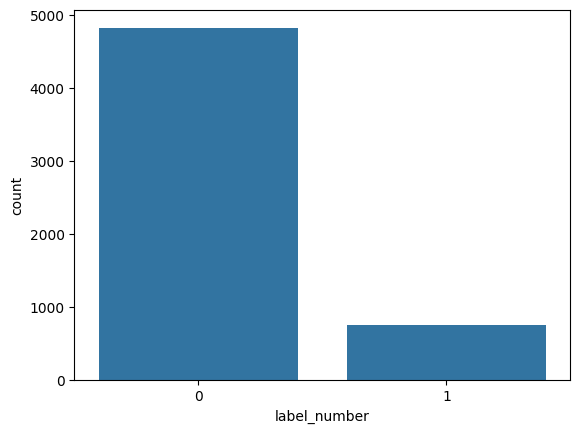

In [4]:
import seaborn as sns
sns.countplot(x='label_number', data=df)

# 5. Importing some more modules

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# 6. Vactorizing the data

In [6]:
vactorizer = TfidfVectorizer(stop_words='english')
X = vactorizer.fit_transform(df.message)
y = df.label_number

# 7. Splitting training and testing data

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3,random_state=42)


# 8. Model selection and training

In [8]:
model = MultinomialNB()
model.fit(train_x, train_y)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


# 9. Accuracy score and classification score

In [9]:
prediction = model.predict(test_x)
print(f"Accuracy: {accuracy_score(test_y, prediction)}")
print(f"\nClassification Report:\n{classification_report(test_y, prediction)}")

Accuracy: 0.9719067543335326

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1447
           1       1.00      0.79      0.88       226

    accuracy                           0.97      1673
   macro avg       0.98      0.90      0.93      1673
weighted avg       0.97      0.97      0.97      1673



# 10. Prediction on new datasets

In [10]:
custom_sms = input("Enter a message: ")
custom_sms_vectorized = vactorizer.transform([custom_sms])
prediction = model.predict(custom_sms_vectorized)
ans = {0:'Not a Spam', 1:'Spam'}[prediction[0]]
print(f"The message is: {ans}")

The message is: Not a Spam


In [11]:
custom_sms = input("Enter a message: ")
custom_sms_vectorized = vactorizer.transform([custom_sms])
prediction = model.predict(custom_sms_vectorized)
ans = {0:'Not a Spam', 1:'Spam'}[prediction[0]]
print(f"The message is: {ans}")

The message is: Spam
